In [5]:
import numpy as np
import pandas as pd
import nltk

import matplotlib.pyplot as plt
%matplolib inline

UsageError: Line magic function `%matplolib` not found.


In [2]:
df = pd.read_csv("./data/reuters-training.csv")

In [3]:
df.head(5)

,category,wire
0,3,the wattie nondiscriminatory mln loss for plc ...
1,4,the termination payment airport takes 6 visibi...
2,3,the lt dlrs demand 000 reuter dividend year lt...
3,4,the in currencies hit firms in has would seven...
4,4,the bleached could mln at world as holding for...


In [6]:
df["len"] = df["wire"].apply(lambda x: len(list(x.split())))

In [7]:
df.head(5)

,category,wire,len
0,3,the wattie nondiscriminatory mln loss for plc ...,87
1,4,the termination payment airport takes 6 visibi...,56
2,3,the lt dlrs demand 000 reuter dividend year lt...,139
3,4,the in currencies hit firms in has would seven...,224
4,4,the bleached could mln at world as holding for...,101


(array([7.619e+03, 9.870e+02, 2.890e+02, 7.900e+01, 5.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  13. ,  249.3,  485.6,  721.9,  958.2, 1194.5, 1430.8, 1667.1,
        1903.4, 2139.7, 2376. ]),
 <a list of 10 Patch objects>)

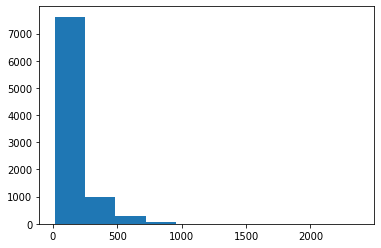

In [8]:
plt.hist(df["len"])

### Stopword removal
### Stemming and Lematization

In [10]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [12]:
wn = WordNetLemmatizer()
ps = PorterStemmer()

In [16]:
print(wn.lemmatize("oxen"))

ox


In [15]:
print(ps.stem("goes"))

goe


In [22]:
from nltk.corpus import stopwords

In [25]:
sw = set(stopwords.words('english'))
print(sw)

{'below', 'we', 'up', 'any', 'whom', 'their', 'needn', 'yours', 'other', 'because', 'an', 'can', 'mustn', 'down', 'after', 'just', 'it', 'than', 'ourselves', 'how', "you've", "isn't", 'they', 'until', 'between', 'and', 'did', 'her', 'myself', 'those', 'isn', 'through', 'further', 'such', 'own', 'haven', "wasn't", 'its', 'where', 'for', 'didn', "hadn't", 'there', 'hers', 'theirs', 'why', 'before', 'doesn', 'wouldn', 'had', 'off', 'once', 's', 'in', 'he', 'under', "she's", 'here', "you'll", 'on', 'out', 'what', 'shan', 'then', 'i', 'who', 'only', "should've", 'herself', 'himself', 'your', 'that', 'do', 'y', 'be', 'each', "that'll", 'this', 'or', 'll', 'wasn', 'about', 'but', 'themselves', "hasn't", "mustn't", "shouldn't", 'with', 'so', 've', 'been', 'same', 'does', 'from', 'our', 'nor', "couldn't", 'couldn', 'my', "it's", 'these', 'she', 'won', 'not', "aren't", 'was', "you'd", 'by', 'him', "mightn't", 'yourself', 'am', 'too', 'don', "won't", 'being', 'against', 'while', 'the', "didn't", 

In [26]:
def clean_text(text):
    text = text.lower()
    words = list(text.split(" "))
    words = [wn.lemmatize(word) for word in words if word not in sw]
    return " ".join(words)

df["clean_text"] = df["wire"].apply(clean_text)

df.head(5)

,category,wire,len,clean_text
0,3,the wattie nondiscriminatory mln loss for plc ...,87,wattie nondiscriminatory mln loss plc said end...
1,4,the termination payment airport takes 6 visibi...,56,termination payment airport take 6 visibility ...
2,3,the lt dlrs demand 000 reuter dividend year lt...,139,lt dlrs demand 000 reuter dividend year lt plu...
3,4,the in currencies hit firms in has would seven...,224,currency hit firm would seven jointly taiwan 2...
4,4,the bleached could mln at world as holding for...,101,bleached could mln world holding include 3 sta...


In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [37]:
count_vectorizer = CountVectorizer(max_df=0.75,
                                 min_df=5,
                                 ngram_range=(1,2),
                                  max_features=len(df))


In [38]:
c_vectors = count_vectorizer.fit_transform(df["clean_text"])

In [39]:
c_vectors.shape , len(df)

((8982, 8982), 8982)

In [40]:
c_vectors = c_vectors.todense()

In [41]:
c_vectors[0]

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
text = [
    "i am going to school",
    "you are going to market",
    "kids are going to school to school",
]

In [50]:
count_vectorizer = CountVectorizer(ngram_range=(1,2))
c_vectors = count_vectorizer.fit_transform(text)


In [51]:
c_vectors.shape

(3, 16)

In [52]:
c_vectors= c_vectors.todense()
print(c_vectors)

[[1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0]
 [0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1]
 [0 0 1 1 1 1 1 1 0 2 1 2 0 2 0 0]]


In [53]:
count_vectorizer.vocabulary_

{'am': 0,
 'going': 4,
 'to': 11,
 'school': 9,
 'am going': 1,
 'going to': 5,
 'to school': 13,
 'you': 14,
 'are': 2,
 'market': 8,
 'you are': 15,
 'are going': 3,
 'to market': 12,
 'kids': 6,
 'kids are': 7,
 'school to': 10}